### Выполнил Якимов Т.В.

02.09.2019

# Отчет

### Цели и задачи проекта, описание исходных и обработанных данных и признаков

Цель: идентифицировать человека по последовательности посещенных им нескольких веб-сайтов. 

Исходные данные (ID пользователя, timestamp, посещенный веб-сайт) собраны с прокси-серверов Университета Блеза Паскаля по 3000 пользователям. Пример исходных данных для одного из пользователей:

<center>user0001.csv</center>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">timestamp</th>
    <th class="tg-031e">site</th>
  </tr>
  <tr>
    <td class="tg-031e">00:00:01</td>
    <td class="tg-031e">vk.com</td>
  </tr>
  <tr>
    <td class="tg-yw4l">00:00:11</td>
    <td class="tg-yw4l">google.com</td>
  </tr>
  <tr>
    <td class="tg-031e">00:00:16</td>
    <td class="tg-031e">vk.com</td>
  </tr>
  <tr>
    <td class="tg-031e">00:00:20</td>
    <td class="tg-031e">yandex.ru</td>
  </tr>
</table>

В ходе выполнения проекта для достижения поставленной цели решались задачи:
- предобработка данных;
- первичный анализ данных;
- визуальный анализ данных;
- сравнение моделей классификации и настройка выбранной модели и изучение ее переобучения.

### Первичный анализ признаков

In [13]:
# Для дальнейшего анализа исходные данные были преобразованы к виду:

,site0,site1,site2,site3,site4,site5,site6,site7,site8,site9,user_id
session_id,,,,,,,,,,,
0,192,577,134,3,134,134,3,134,204,134,1
1,416,193,683,254,134,31,393,3520,217,55,1
2,55,3,55,55,5,293,416,337,917,55,1
3,483,3737,483,55,55,55,55,982,201,123,1
4,348,55,5,4462,259,212,4210,2418,684,2418,1


В результате первичного анализа признаков приходим к следующим результатам:
1. Количество уникальных сессий (длина сессии - 10 сайтов) в выборке с 10 пользователями - 1406.
2. Количество уникальных сессий (длина сессии - 10 сайтов) в выборке с 150 пользователями - 137019.
3. Количество уникальных сайтов в выборке с 10 пользователями - 4912.
3. Количество уникальных сайтов в выборке с 150 пользователями - 27796.

Топ-10 наиболее популярных сайтов из выборки с 150 пользователями (в порядке убывания популярности):
'www.google.fr',
'www.google.com',
'www.facebook.com',
'apis.google.com',
's.youtube.com',
'clients1.google.com',
'mail.google.com',
'plus.google.com',
'safebrowsing-cache.google.com',
'www.youtube.com'

Проведем более детальный первичный анализ данных на выборке из 10 пользователей.

Распределение количества сайтов по пользователям в каждой сессии из 10 подряд посещенных сайтов (в порядке убывания):
* 7 -     2796
* 3 -     2204
* 8 -     1868
* 6 -     1712
* 9 -     1643
* 2 -     1022
* 4 -      802
* 1 -      760
* 5 -      720
* 10 -     534

Распределение числа уникальных признаков в каждой сессии из 10 подряд посещенных сайтов (в порядке убывания):
* 7 -    2308
* 6 -    2197
* 8 -    2046
* 5 -    1735
* 9 -    1394
* 2 -    1246
* 4 -    1163
* 3 -     894
* 10 -    651
* 1 -     427

Выдвинем и проверим гипотезы:
* Гипотеза: распределение числа уникальных признаков в каждой сессии нормальное. Опровергнута (QQ-плот и критерия Шапиро-Уилко).
* Гипотеза: пользователь хотя бы раз зайдет на сайт, который он ранее посетил в сессии из 10 сайтов. Опровергнута (биномиальный критерий для доли, p-value = 0.02207653769072678).

95 % интервал для доли случаев, когда пользователь повторно посетил какой-то сайт: [0.95 0.957]

95 % интервал средней частоты появления сайта в выборке (на основе bootstrap): [22.51524527 35.76303684]

### Первичный визуальный анализ признаков

Дополнительно были созданы следующие признаки:
* продолжительность сессии (разница между максимальным и минимальным временем посещения сайтов в сессии, в секундах)
* число уникальных сайтов в сессии
* час начала сессии (то есть час в записи минимального timestamp среди десяти)
* day_of_week – день недели (то есть день недели в записи минимального timestamp среди десяти)

Проведен анализ полученных признаков. 
* Медианная продолжительность сессии в выборке из 10 пользователей - 37 сек.
* Медианный день недели, в который началась сессия 10 пользователей - 3.
* Медианный час начала сессии 150 пользователей - 13.
* Медианное значение числа уникальных сайтов в сессиях 150 пользователей - 7.


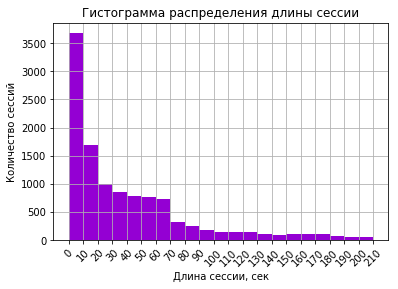

In [18]:
# Гистограмма распределения длины сессии 10 пользователей (в секундах).

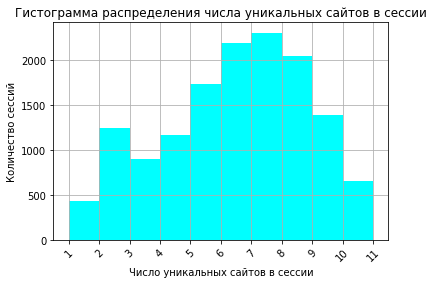

In [19]:
# Гистограмма распределения числа уникальных сайтов в сессии 10 пользователей.

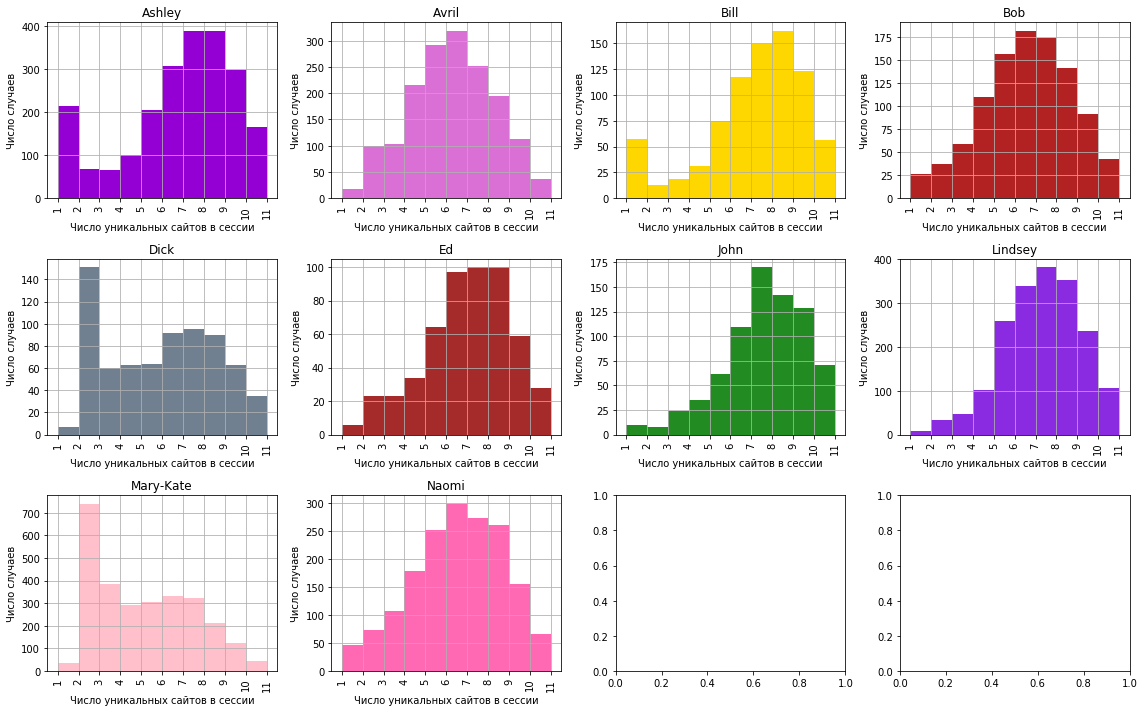

In [20]:
# Гистограммы распределения числа уникальных сайтов для каждого поьзователя из выборки 10 пользователей.

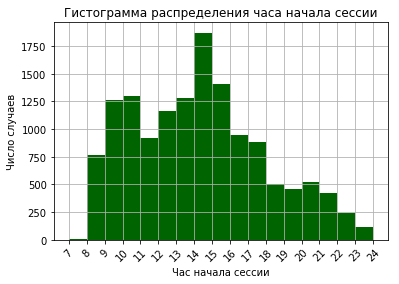

In [21]:
# Гистограмма распределения часа начала сессии 10 пользователей.

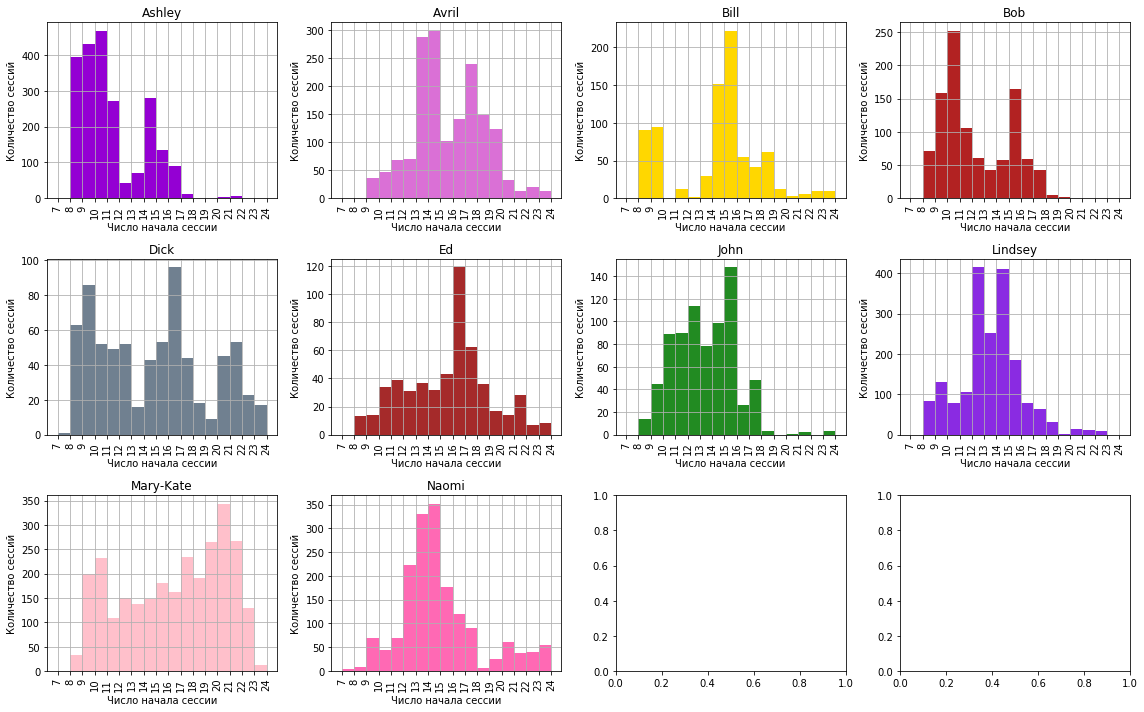

In [22]:
# Гистограммы распределения часа начала сессии для каждого из 10 пользователей.

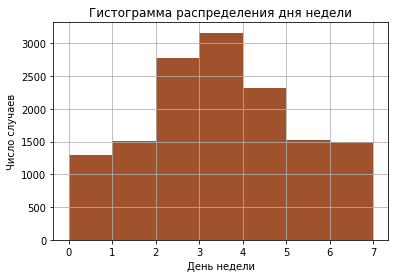

In [23]:
# Гистограмма распределения дня недели, в который началась сессия.

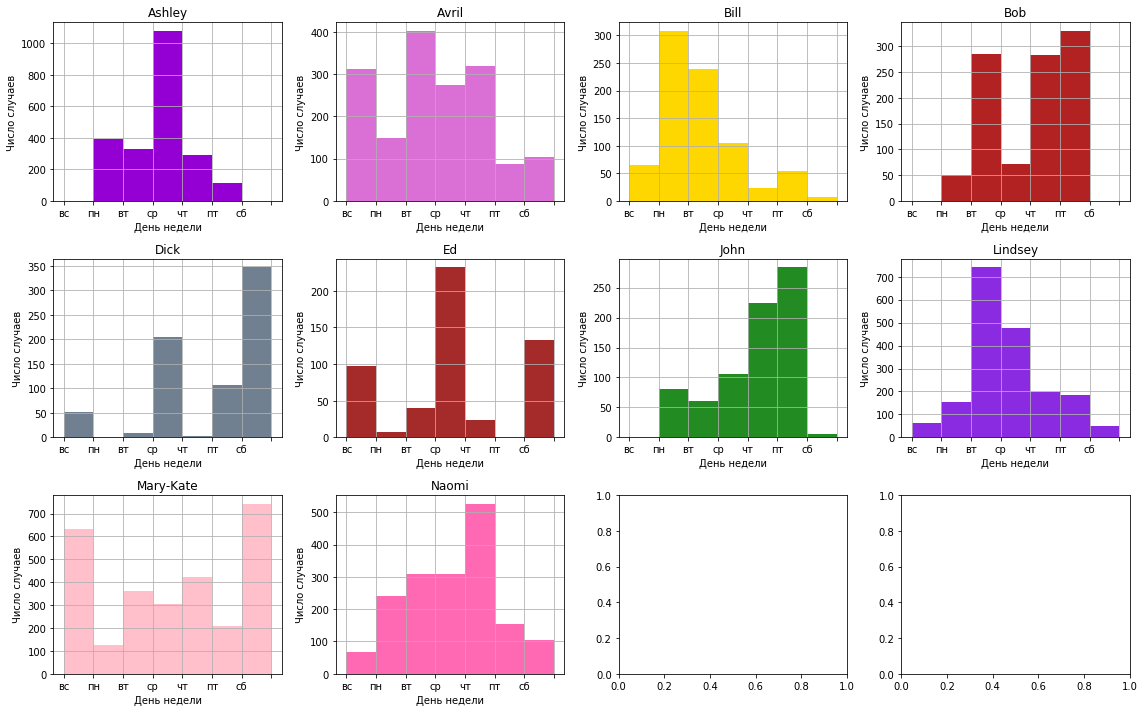

In [24]:
# Гистограммы распределения дня недели, в который началась сессия, для каждого из 10 пользователей.

Выводы для каждого из 10 пользователей.

1. Ashley
Посещение сайтов исключительно в будние дни в основном в утренние часы. Максимум количества уникальных сайтов в сессии приходится на 7-8.
Предположительно пользователь использует сайты для работы.

2. Avril
Посещение сайтов в основном в будние дни и послеобеденные часы (13-14 часов). Максимум количества уникальных сайтов в сессии приходится на 5-6.

3. Bill
Посещение сайтов в основном в будние дни в начале недели (пн-вт) и утренние (8-9 часов)/послеобеденные часы (14-15 часов). Максимум количества уникальных сайтов в сессии приходится на 7-8.

4. Bob 
Посещение сайтов исключительно в будние дни (вт, чт, пт) в основном в утренние (9-10 часов)/предвечерние (15-17) часы. Максимум количества уникальных сайтов в сессии приходится на 6-7.
Предположительно пользователь использует сайты для работы.

5. Dick
Посещение сайтов в основном в выходные дни в начале недели в течение дня. Пик количества уникальных сайтов в сессии приходится на 2. 

6. Ed
Посещение сайтов в основном в среду и выходные дни в предвечерние часы (16-17 часов). Максимум количества уникальных сайтов в сессии приходится на 6-8.

7. John
Имеется тенденция к росту количества сессий к онончанию рабочей недели (максимум в пт). В выходные сайты почти не посещает. Отсутствуют сильно выраженные пики на графике с часами начала сессии. Максимум количества уникальных сайтов в сессии приходится на 7-9.

8. Lindsey
Посещение сайтов в течение недели с максимумом в середине недели (вт, ср) в обеденные/послеобеденные часы (12-14 часов). Максимум количества уникальных сайтов в сессии приходится на 6-8.

9. Mary-Kate
Посещение сайтов в течение недели с максимумом в выходные, в вечерние (после 19 часов) и утрениие (10-11) часы. Максимум количества уникальных сайтов в сессии приходится на 2-3.

10. Naomi
Посещение сайтов в течение недели с основном в будние, в послеобеденное время (после 13-14 часов) часы. Максимум количества уникальных сайтов в сессии приходится на 6-8.


[Text(0,0,'s.youtube.com'),
 Text(0,0,'www.google.fr'),
 Text(0,0,'www.google.com'),
 Text(0,0,'mail.google.com'),
 Text(0,0,'www.facebook.com'),
 Text(0,0,'apis.google.com'),
 Text(0,0,'r3---sn-gxo5uxg-jqbe.googlevideo.com'),
 Text(0,0,'r1---sn-gxo5uxg-jqbe.googlevideo.com'),
 Text(0,0,'plus.google.com'),
 Text(0,0,'accounts.google.com')]

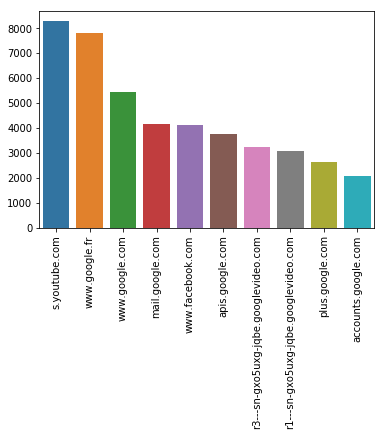

In [28]:
# Гистограмма посещения топ-10 сайтов.

### Если создаются признаки, то описание этого процесса

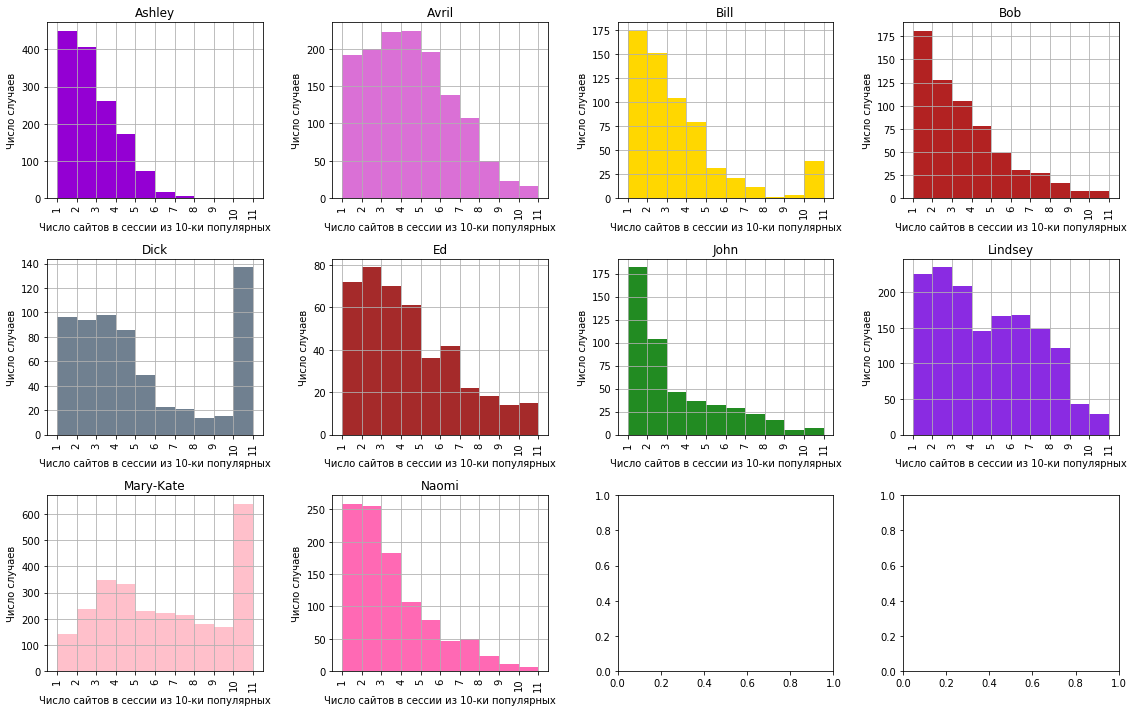

In [44]:
# Гистограммы числа сайтов из 10-ки популярных по пользователям

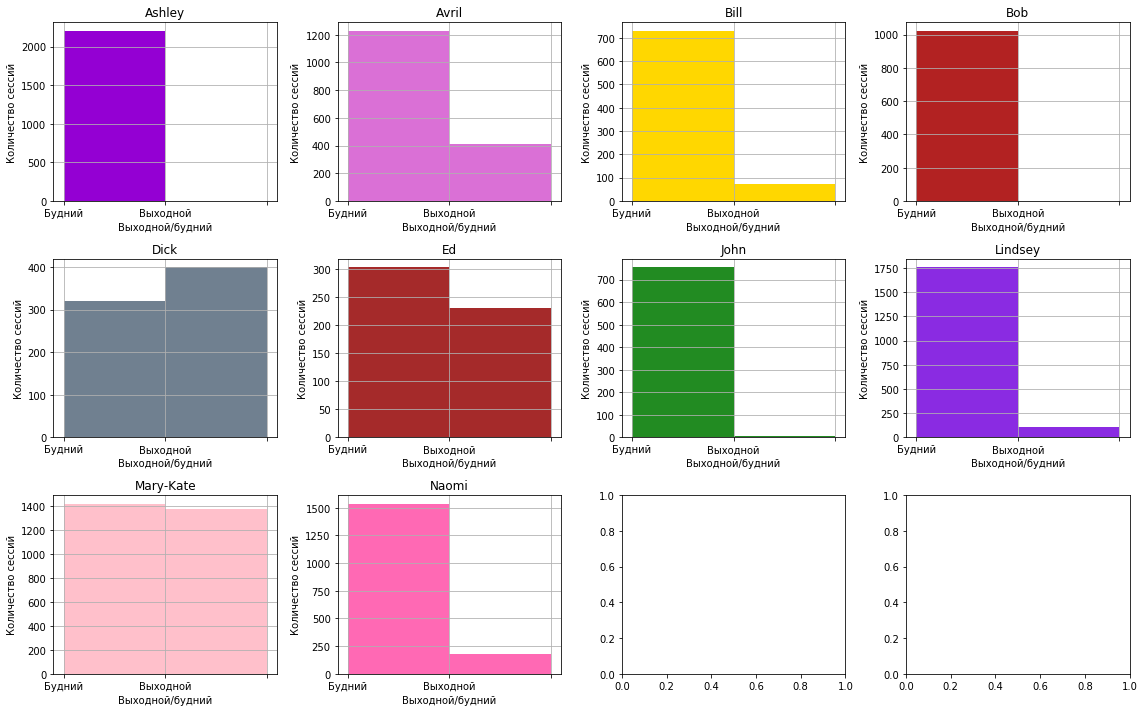

In [45]:
# Гистограммы количества сессий по частям недели (выхлдной/будний)

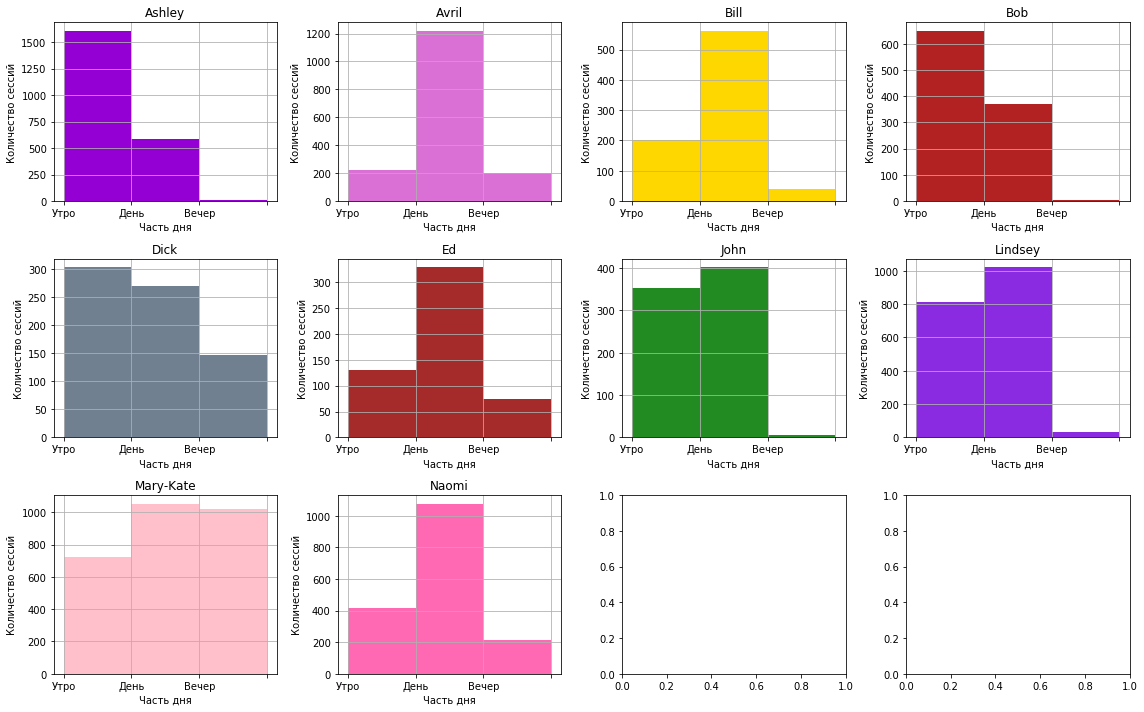

In [46]:
# Гистограммы количества сессий по части дня (утро, день, вечер)

### Кросс-валидация, построение кривых валидации и обучения

На сессиях из 10 сайтов произведено сравнение четырех моделей: 
* KNeighborsClassifier (accuracy = 0.584)
* RandomForestClassifier (accuracy = 0.736)
* LogisticRegression (accuracy = 0.776)
* LinearSVC (accuracy = 0.782)

Для каждой модели построена кривая кросс-валидация доли правильных ответов по параметру регуляризации С. С учетом этого лучшие результаты показала LinearSVC. Для нее подобраны оптимальные параметры session_length и window_size. В результате чего удалось улучшить accuracy.

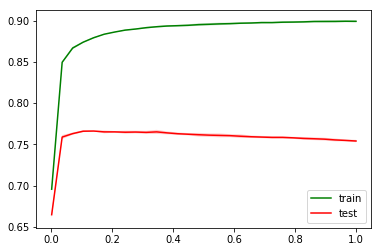

In [54]:
# График зависимости доли правильных ответов на кросс-валидации от С (модель - LinearSVC)

Построена кривая обучения зависимости accuracy от объема обучающей выборки. Установлен объем выборки, при котором существенного улучшения accuracy не происходит. 

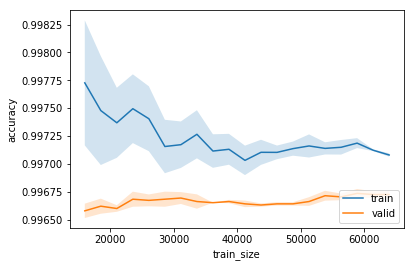

In [116]:
# Пример кривой обучения для 128-го пользователя из выборки 150 пользователей

### Оценка модели с описанием выбранной метрики

Оригинальные созданные признаки:
* будний/выходной
* часть дня (утро, день, вечер)
* день недели
* длина сессии (short/long)

После создания оригинальных признаков (дополнительных к существующим) было проведено повторное тестирование вышеупомянутых моделей, в результате чего наилучшие результаты показала LogisticRegression. ROC AUC score на на лидерборде соревнования kaggle - 0.95526.

### Выводы

Построенная модель может применяться на практике в задачах, в которых необходимо прогнозировать поведение пользователя на событийно-временных признаках. Пример такой задачи - предсказать покупателя по набору приобретенных товаров и времени покупки. 

В дальнейшем модель можно улучшать. Например, попытаться нормализовать сайты, создать новые признаки на основе доменнов сайтов, задействовать дополнительные источники информации (например, информация о французских праздниках, каникулах и т.п.).